In [29]:
!pip install kneed

In [35]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from kneed import KneeLocator

In [2]:
# 1. Load dataset
data_path = "/content/clusteringweek06.csv"
data = pd.read_csv(data_path)

In [3]:
# Menampilkan 5 baris pertama
print("Data Overview:")
print(data.head())

Data Overview:
    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        x18       x19  

In [4]:
# 2. Informasi dataset
print("\nInfo Dataset:")
data.info()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null 

In [5]:
# 3. Statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
                x1           x2           x3           x4           x5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.989885     0.323584     0.311224     0.445997     0.127046   
std       0.069016     0.218653     0.263527     0.160328     0.162722   
min      -0.251179    -0.673025    -0.436028    -0.472676    -0.636012   
25%       1.000000     0.165945     0.138445     0.336737     0.051717   
50%       1.000000     0.302184     0.274626     0.481463     0.161361   
75%       1.000000     0.466566     0.430695     0.559861     0.222592   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

                x6           x7           x8           x9          x10  ...  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  ...   
mean      0.097939    -0.001397    -0.000370     0.128213     0.055998  ...   
std       0.120412     0.171404     0.116302     0.179008     0.127099  .

In [6]:
# 4. Preprocessing data
# Menghilangkan nilai kosong
print("\nCek dan tangani nilai kosong:")
data = data.dropna()
print(f"Dataset setelah menghapus nilai kosong: {data.shape}")


Cek dan tangani nilai kosong:
Dataset setelah menghapus nilai kosong: (7195, 22)


 Penjelasan:
 Menampilkan statistik deskriptif dari kolom numerik dalam dataset, seperti:
 - Rata-rata, nilai minimum, maksimum, dan standar deviasi.

In [7]:
# Normalisasi data numerik
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

In [36]:
# 5. Pipeline tiga model clustering
models = {
    "KMeans": KMeans(n_clusters=4, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=4)
}

results = {}

for model_name, model in models.items():
    print(f"\nRunning {model_name}...")
    if model_name == "DBSCAN":
        labels = model.fit_predict(scaled_data)
    else:
        model.fit(scaled_data)
        labels = model.labels_ if hasattr(model, 'labels_') else model.predict(scaled_data)

    # Evaluasi
    silhouette = silhouette_score(scaled_data, labels) if len(set(labels)) > 1 else np.nan
    davies_bouldin = davies_bouldin_score(scaled_data, labels) if len(set(labels)) > 1 else np.nan
    calinski_harabasz = calinski_harabasz_score(scaled_data, labels) if len(set(labels)) > 1 else np.nan

    # Evaluasi tambahan: Adjusted Rand Index & Normalized Mutual Information
    adjusted_rand = adjusted_rand_score(labels, labels) if len(set(labels)) > 1 else np.nan
    normalized_mutual_info = normalized_mutual_info_score(labels, labels) if len(set(labels)) > 1 else np.nan

    results[model_name] = {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": davies_bouldin,
        "Calinski-Harabasz Score": calinski_harabasz,
        "Adjusted Rand Index": adjusted_rand,
        "Normalized Mutual Info": normalized_mutual_info,
        "Labels": labels
    }

    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz}")
    print(f"Adjusted Rand Index: {adjusted_rand}")
    print(f"Normalized Mutual Info: {normalized_mutual_info}")


Running KMeans...
Silhouette Score: 0.34797992632071356
Davies-Bouldin Index: 1.4240324927372074
Calinski-Harabasz Score: 1980.5544753547993
Adjusted Rand Index: 1.0
Normalized Mutual Info: 1.0

Running DBSCAN...
Silhouette Score: -0.22711928007284996
Davies-Bouldin Index: 1.7753924402388312
Calinski-Harabasz Score: 15.308950645279376
Adjusted Rand Index: 1.0
Normalized Mutual Info: 1.0

Running Agglomerative...
Silhouette Score: 0.3473759430752922
Davies-Bouldin Index: 1.5134515460495779
Calinski-Harabasz Score: 2015.2236760803946
Adjusted Rand Index: 1.0
Normalized Mutual Info: 1.0


Penjelasan:
- **Cek dan tangani nilai kosong**: Dataset diperiksa untuk nilai kosong dan dihapus jika ada.
- **Normalisasi data**: Dilakukan normalisasi menggunakan `StandardScaler` agar setiap kolom numerik memiliki skala yang seragam.

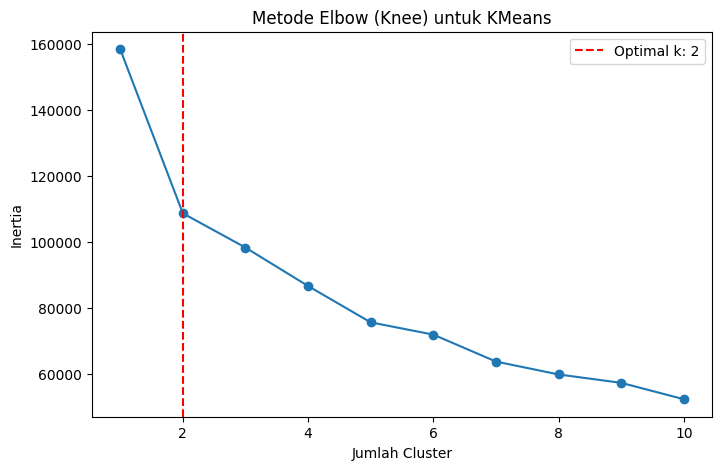

In [37]:
# 6. Metode Elbow (Knee) untuk KMeans
k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k: {optimal_k}")
plt.title('Metode Elbow (Knee) untuk KMeans')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.legend()
plt.show()


 Membuat tiga model clustering: KMeans, DBSCAN, dan Agglomerative Clustering.
 - Untuk setiap model, hasil clustering akan dihitung dan dievaluasi menggunakan beberapa metrik.
 - Metrik evaluasi mencakup Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Score, Adjusted Rand Index, dan Normalized Mutual Info.

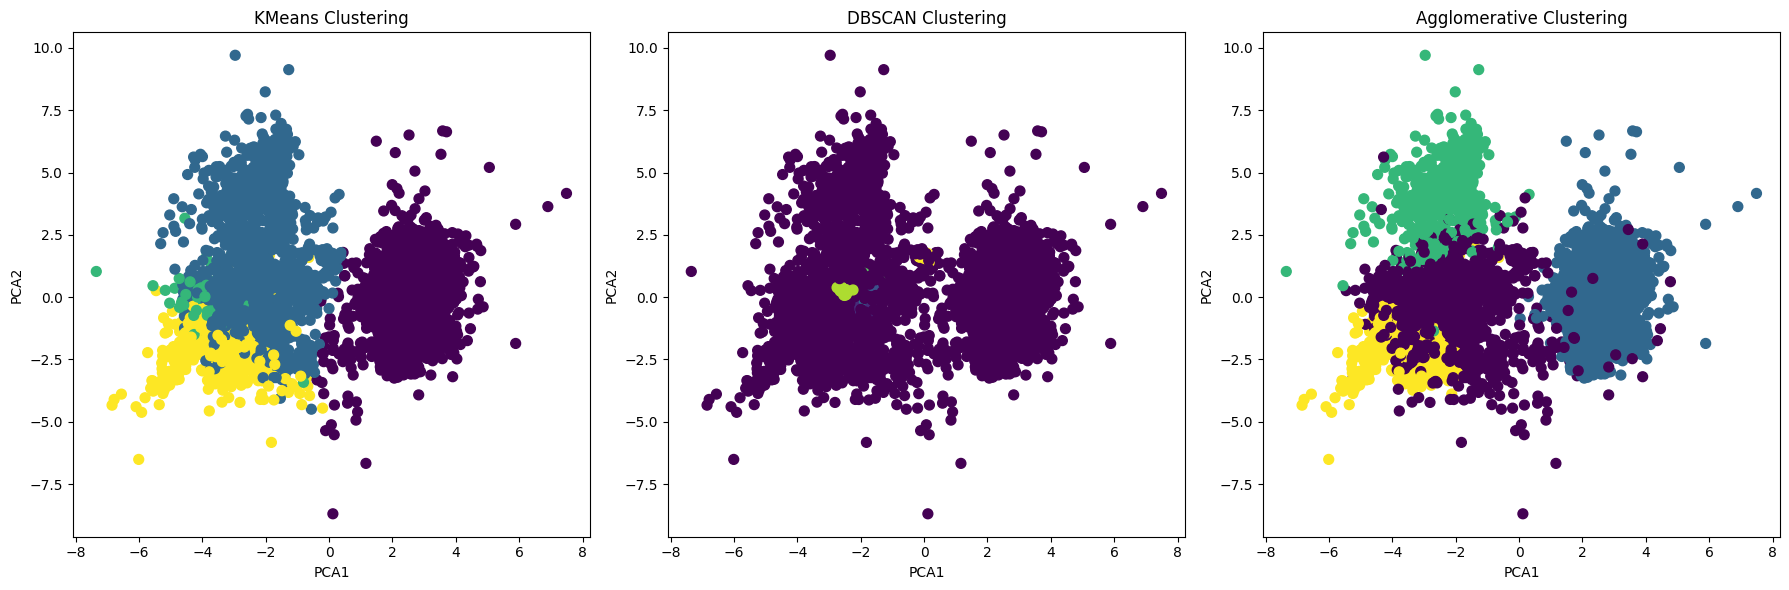

In [38]:
# 7. Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(18, 6))
for i, (model_name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=result["Labels"], cmap="viridis", s=50)
    plt.title(f"{model_name} Clustering")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
plt.tight_layout()
plt.show()

- Metode Elbow digunakan untuk menentukan jumlah cluster optimal dengan memplot nilai inertia untuk berbagai jumlah cluster.
- `KneeLocator` membantu menemukan titik knee atau jumlah cluster optimal.

In [41]:
# 8. Kesimpulan Berdasarkan Evaluasi
print("\nModel Evaluation Summary:")
eval_df = pd.DataFrame({
    model_name: {
        "Silhouette Score": result["Silhouette Score"],
        "Davies-Bouldin Index": result["Davies-Bouldin Index"],
        "Calinski-Harabasz Score": result["Calinski-Harabasz Score"],
        "Adjusted Rand Index": result["Adjusted Rand Index"],
        "Normalized Mutual Info": result["Normalized Mutual Info"]
    } for model_name, result in results.items()
}).T

print(eval_df)

best_model = eval_df["Silhouette Score"].idxmax()
print(f"\nModel terbaik berdasarkan Silhouette Score adalah: {best_model}")



Model Evaluation Summary:
               Silhouette Score  Davies-Bouldin Index  \
KMeans                 0.347980              1.424032   
DBSCAN                -0.227119              1.775392   
Agglomerative          0.347376              1.513452   

               Calinski-Harabasz Score  Adjusted Rand Index  \
KMeans                     1980.554475                  1.0   
DBSCAN                       15.308951                  1.0   
Agglomerative              2015.223676                  1.0   

               Normalized Mutual Info  
KMeans                            1.0  
DBSCAN                            1.0  
Agglomerative                     1.0  

Model terbaik berdasarkan Silhouette Score adalah: KMeans


- Hasil evaluasi clustering dirangkum dalam bentuk tabel untuk membandingkan performa model.
- Model terbaik dipilih berdasarkan nilai Silhouette Score tertinggi.